<a href="https://colab.research.google.com/github/mandipat/mandipat/blob/main/ISE_599_Hw2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import regularizers , optimizers
import math


In [ ]:
def Tanh(input_dim, output_dim, width, depth,lambdaa=0.01):
    model = tf.keras.Sequential()
      #add the first hidden layer
    model.add(tf.keras.layers.Dense(width, activation='tanh',
                                    kernel_regularizer=
                                    tf.keras.regularizers.l2(lambdaa),
                                    input_dim=input_dim,
                                    kernel_initializer=tf.keras.initializers
                                    .RandomUniform(minval=-1, maxval=1),
                                    bias_initializer=tf.keras.initializers.
                                    RandomUniform(minval=-1, maxval=1)))

  #add the reaming hidden layers
    for _ in range(depth - 2):
        model.add(tf.keras.layers.Dense(width, activation='tanh',
                                        kernel_regularizer=
                                        tf.keras.regularizers.l2(lambdaa),
                                        kernel_initializer=tf.keras.initializers.
                                        RandomUniform(minval=-1, maxval=1),
                                        bias_initializer=tf.keras.initializers.
                                        RandomUniform(minval=-1, maxval=1)))
 # add output layer
    model.add(tf.keras.layers.Dense(output_dim, activation=None,
                                    kernel_regularizer=
                                    tf.keras.regularizers.l2(lambdaa),
                                    kernel_initializer=tf.keras.initializers.
                                    RandomUniform(minval=-1, maxval=1),
                                    bias_initializer=tf.keras.initializers.
                                    RandomUniform(minval=-1, maxval=1)))

    return model


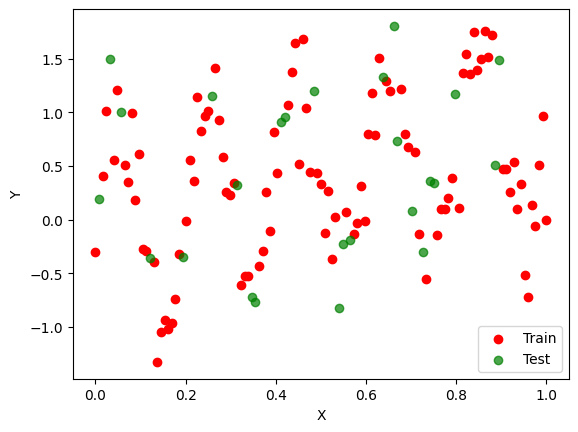

In [ ]:
# Q2 creating the data set and plotting

from sklearn.model_selection import train_test_split
import random

np.random.seed(154345)
x=np.linspace(0,1,125)
y=np.zeros(125)
noise=np.random.normal(0,0.3,125)
x=np.sort(x)
for i in range(124):
  y[i]=x[i] + math.sin(math.pi*10*x[i])+noise[i]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=25/125)

plt.scatter(X_train, y_train,color='red',label="Train")
plt.scatter(X_test,y_test,color='green',label='Test',alpha=0.7)
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.show()


In [ ]:
# Define parameters
input_dim = 1
output_dim = 1
depth = 10
width = 15
lambdaa=[1e-6,1e-3,1e-2]
no_epoch=5000
bch_size=25
lr_rate=1e-3
y_pred=[]
x_test1=np.linspace(0,1,1000)
x_reshaped = x_test1.reshape(1000,1)


32/32 [==============================] - 0s 2ms/step


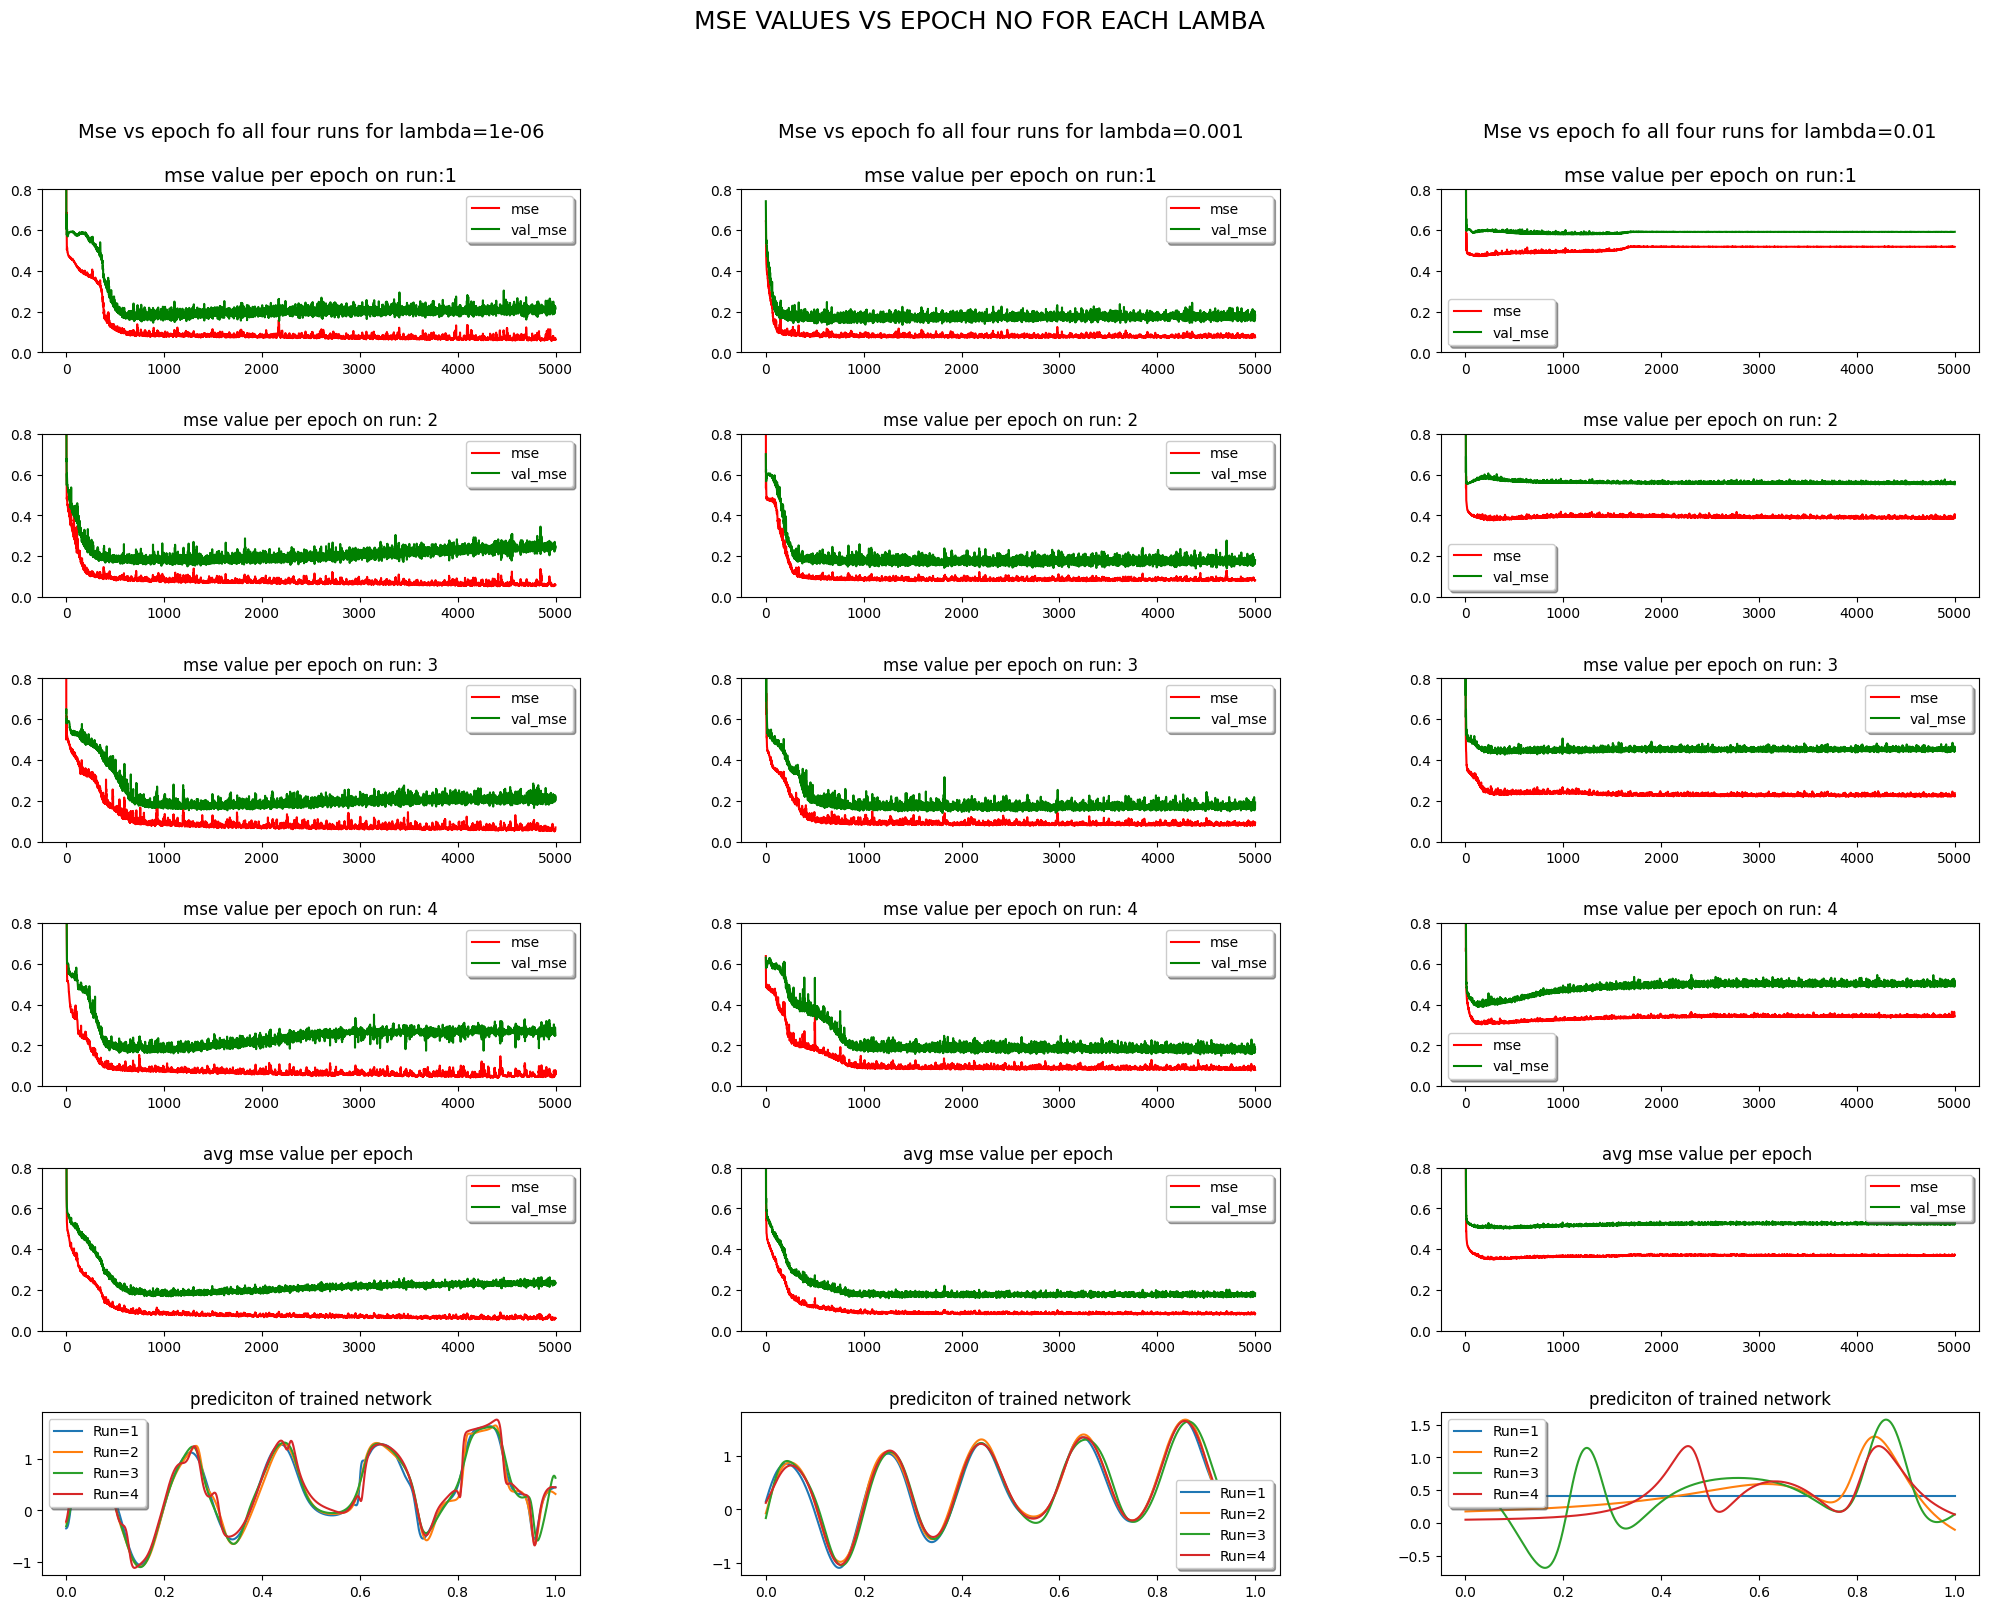

In [ ]:
fig,ax=plt.subplots(6,3,figsize=(25, 18))
metric=[]
for i in range(len(lambdaa)):
      num_runs=4
      training_mse_per_run=[]
      val_mse_per_run=[]

      fig.suptitle("MSE VALUES VS EPOCH NO FOR EACH LAMBA",size=18)
      fig.subplots_adjust(hspace=0.5, wspace=0.3)
      for run in range(num_runs):
        # Initialize the model with different weight initializeations
        model1 = Tanh(input_dim, output_dim, width, depth,lambdaa[i])
        model1.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss="mse"
        , metrics=["mse"])

        history=model1.fit(X_train,y_train,batch_size=bch_size,epochs=no_epoch,
                           shuffle=True,
                           validation_data=(X_test,y_test),verbose=0)
        #get the y predcited values
        y_predict=model1.predict(x_test1)
        # Get the training MSE for each epoch
        training_mse = history.history['mse']

        # Store training MSE for this run
        training_mse_per_run.append(training_mse)

        # Get the training val_MSE for each epoch
        val_mse = history.history['val_mse']

        # Store training MSE for this run

        val_mse_per_run.append(val_mse)
        #storing

        y_reshaped = y_predict.reshape(1000, 1)



        ax[run,i].plot(training_mse_per_run[run],label='mse',color='red')
        ax[run,i].plot(val_mse_per_run[run],label="val_mse",color='green')
        ax[run,i].legend
        ax[run,i].set_title(f'mse value per epoch on run: {run+1}')
        ax[run,i].legend(shadow=True, fancybox=True)
        ax[run,i].set_ylim(0,0.8)
        ax[5,i].plot(x_reshaped,y_reshaped,label=f'Run={run+1}')
        ax[5,i].legend(shadow=True, fancybox=True)
        ax[5,i].set_title(f'prediciton of trained network')

      from numpy import array, average
      avg_mse=average(training_mse_per_run,axis=0)
      avg_val_mse=average(val_mse_per_run,axis=0)
      ax[run+1,i].plot(avg_mse,label='mse',color='red')
      ax[run+1,i].plot(avg_val_mse,label='val_mse',color='green')
      ax[run+1,i].legend
      ax[run+1,i].set_title(f'avg mse value per epoch ')
      ax[run+1,i].legend(shadow=True, fancybox=True)
      ax[run+1,i].set_ylim(0,0.8)
      ax[0, i].set_title(f'Mse vs epoch fo all four runs for lambda={lambdaa[i]}
                         \n\nmse value per epoch on run:1',size=14)

      metric.append([avg_mse[no_epoch-1],avg_val_mse[no_epoch-1]])





In [ ]:

#q3
df = pd.DataFrame(metric, columns=['mse', 'val_mse'],index=['lr: 10e-6','lr: 0.001','lr: 0.01'])
print(df)

                mse   val_mse
lr: 10e-6  0.062309  0.232484
lr: 0.001  0.082165  0.182964
lr: 0.01   0.372701  0.527239


B) The choosinf go regulirzation paramenter is very important  parameters to decrese overfiiting at an expensice of adding bias to the problem.
However we see that choosing lanva as 10e-6 gives us the best mse but our main interest is in validating the test datset. lamba value of 0.001 gives us the best val_mse with 0.17. Thus choosing 0.001 as lamba is optimal value.



C) The regularization parameter of value 0.001 yeild the best result closed to noise free target region.
with larger value of lamba there is no consitancy with the predictions, each run gives different values. With a lower value of lamba 10e-6 the model overfits which clearly has differences in the prediciting the results. Thus the lamba value of 0.001 is the optimal value for our model.
